In [1]:
import pandas as pd

In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
# retrieve the table from the website and convert it into a dataframe
mars_df = pd.DataFrame(pd.read_html(url)[0])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

How many months exist on Mars?

In [4]:
unique_mon = len(mars_df['month'].unique())
unique_mon

12

How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [5]:
martian_days = len(mars_df['sol'].unique())
martian_days

1867

What are the coldest and the warmest months on Mars (at the location of Curiosity)?

In [6]:
# group the dataframe by month
mars_by_month = mars_df.groupby('month')
# find the average temperature of each month
monthly_temp = mars_by_month[['min_temp']].mean().reset_index()

In [8]:
# find the coldest month 
coldest_month = monthly_temp[monthly_temp['min_temp'] == monthly_temp['min_temp'].min()]
print(f"The coldest month on mars is month #{coldest_month['month'].values[0]} with the average temperature {coldest_month['min_temp'].values[0]}" )

# find the warmest month
warmest_month = monthly_temp[monthly_temp['min_temp'] == monthly_temp['min_temp'].max()]
print(f"The warmest month on mars is month #{warmest_month['month'].values[0]} with the average temperature {warmest_month['min_temp'].values[0]}" )

The coldest month on mars is month #3 with the average temperature -83.30729166666667
The warmest month on mars is month #8 with the average temperature -68.38297872340425


<AxesSubplot:xlabel='month'>

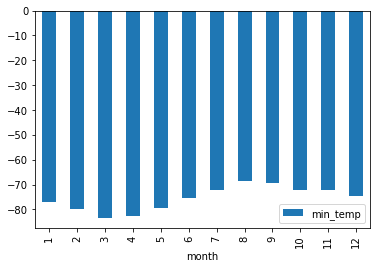

In [9]:
# plot the monthly temperature as a bar chart
monthly_temp.plot(kind='bar', x='month', y='min_temp')

Which months have the lowest and highest atmospheric pressure on Mars?

In [11]:
# find the average pressure of each month
monthly_pressure = mars_by_month[['pressure']].mean().reset_index()

# find the month of lowest pressure
low_pressure = monthly_pressure[monthly_pressure['pressure'] == monthly_pressure['pressure'].min()]
print(f"The month of lowest pressure is month #{low_pressure['month'].values[0]} with an average pressure {low_pressure['pressure'].values[0]}")

# find the month of highest pressure
high_pressure = monthly_pressure[monthly_pressure['pressure'] == monthly_pressure['pressure'].max()]
print(f"The month of highest pressure is month #{high_pressure['month'].values[0]} with an average pressure {high_pressure['pressure'].values[0]}")

The month of lowest pressure is month #6 with an average pressure 745.0544217687075
The month of highest pressure is month #9 with an average pressure 913.3059701492538


<AxesSubplot:xlabel='month'>

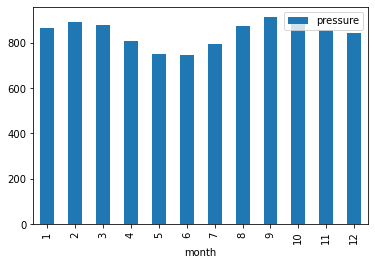

In [12]:
# plot the monthly atmospheric pressure as a bar chart
monthly_pressure.plot(kind='bar', x='month', y='pressure')

About how many terrestrial (Earth) days exist in a Martian year?

<AxesSubplot:xlabel='terrestrial_date'>

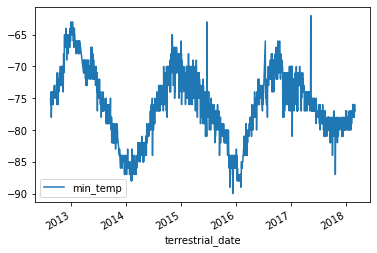

In [13]:
mars_df.plot(x='terrestrial_date', y='min_temp')

In the plot graph, we observe that Mars reaches its lowest temperature at the mark of 2014, and the second time it reches the lowest
temperature was slightly before 2016. Therefore, we can roughly estimate that a Mars year is around 700 Earth days.

In [14]:
# Export the data as a csv
mars_df.to_csv("mars_data.csv")